# Import des outils / jeu de données

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [36]:
np.random.seed(0)
sns.set_theme()

In [37]:
df = pd.read_csv("data/data-cleaned.csv", sep=",", index_col="ID", parse_dates=True)

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NbAcceptedCampaigns,HasAcceptedCampaigns,NbChildren
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,1,0,False,0
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,0,0,False,2
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,0,0,False,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,0,0,False,1
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,0,0,False,1


# Création de variables

In [ ]:
# todo : faire une var somme des achats sur le web
# todo : faire un client type par type d'achat (web / magasin) => est-ce que les gens qui achètent en web / magasin sont différents ?
# todo : créer une variable duréeClient qui dit depuis quand le client est inscrit

In [ ]:
# todo: commenter la démarche

In [ ]:
df["NbAcceptedCampaigns"] = 0

for i in range(1, 6):
    df["NbAcceptedCampaigns"] += df[f"AcceptedCmp{i}"].astype(int)

<Axes: xlabel='NbAcceptedCampaigns', ylabel='Count'>

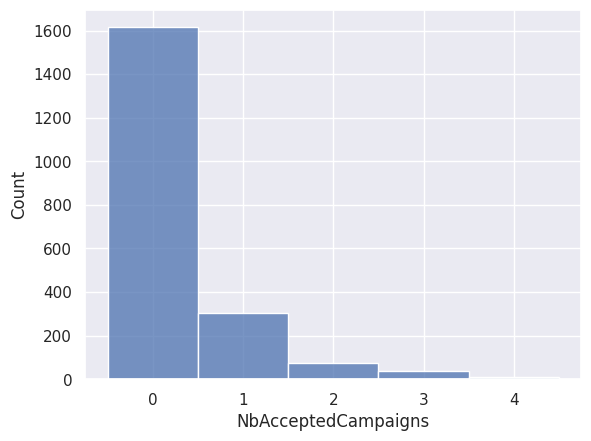

In [ ]:
sns.histplot(df["NbAcceptedCampaigns"], discrete=True)

In [ ]:
df["HasAcceptedCampaigns"] = df["NbAcceptedCampaigns"] > 0

<Axes: xlabel='HasAcceptedCampaigns', ylabel='Count'>

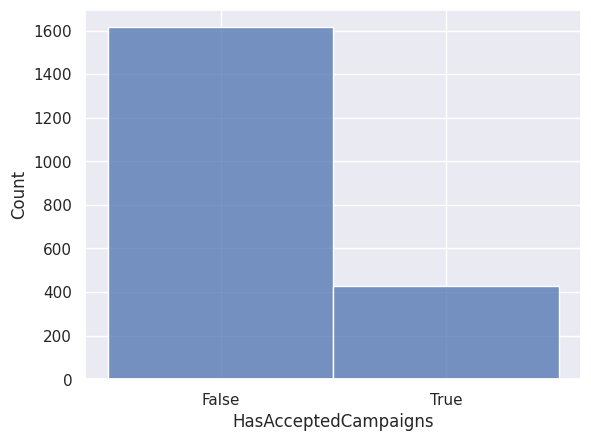

In [ ]:
sns.histplot(df["HasAcceptedCampaigns"].astype(str))

In [ ]:
df_clients = df[df["HasAcceptedCampaigns"]]
df_not_clients = df[~df["HasAcceptedCampaigns"]]

In [ ]:
# todo: créer une variable qui additionne le nombre d'enfants Kids et Teen (mais avant cela, vérifier si par exemple Kids et Teen apportent des informations différentes => si les deux sont complémentaires, on les laisse / sinon on les supprime au profit de notre nouvelle variable)

<Axes: xlabel='Kidhome,Teenhome'>

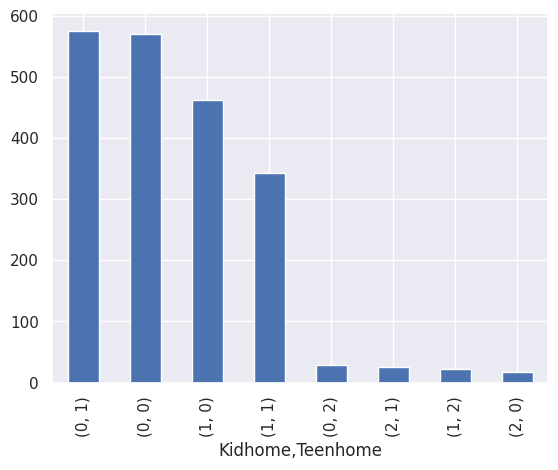

In [ ]:
df[["Kidhome", "Teenhome"]].value_counts().plot(kind="bar")

In [ ]:
df["NbChildren"] = df["Kidhome"].astype(int) + df["Teenhome"].astype(int)

<Axes: xlabel='NbChildren', ylabel='Count'>

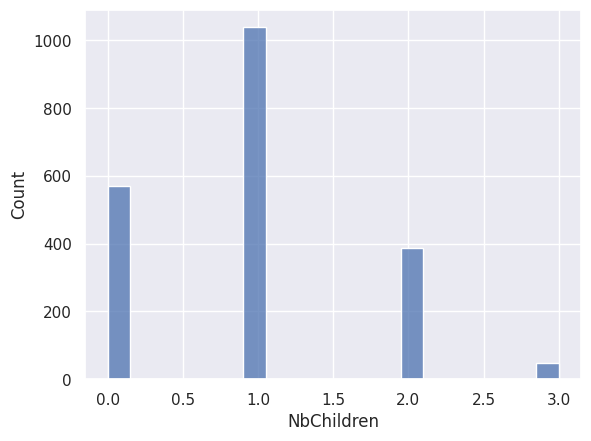

In [ ]:
sns.histplot(df["NbChildren"])

In [ ]:
# todo: créer une variable "NbAcceptedCampaignsWithResponse", qui contient donc la 6ème campagne marketing => l'objectif est de clusteriser les gens en fonction de "à quel point ils sont marketables" => c'est-à-dire, on présente nos résultats en disant sur qui il vaut mieux se concentrer pour faire des pubs

In [ ]:
# todo: créer une variable "RevenuePerClient" => le revenu rapporté par chaque client => ce serait plutôt juste une variable type "KPI" à afficher dans un dashboard non ?

In [ ]:
# todo: de même, créer une variable "RevenueWinePerClient" => le revenu de vin pour chaque client, et faire de même pour chaque produit => par la suite on pourra faire des représentations "quel client rapporte le plus de vin"

# Sauvegarde du Dataframe

In [ ]:
df.to_csv("data/data-cleaned-feature-engineering.csv")